In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##Crowdfunding
Crowdfunding is a method of raising funds for a project, business, or cause by collecting small amounts of money from a large number of people, typically through online platforms. It allows individuals, entrepreneurs, or organizations to present their ideas to the public and seek financial support without relying solely on traditional funding sources like banks or venture capitalists.
"Backers" refers to the number of people who financially supported the project. These are individuals who pledged money to help fund the project in exchange for rewards, recognition, or simply to support the idea.

For example:

If a project has 150 backers, it means 150 individuals contributed to the project’s crowdfunding campaign.
This metric is crucial because it reflects the level of interest and community support a project has garnered.

Pledge means a promise or commitment to contribute a specific amount of money to support a cause, project, or campaign. In crowdfunding, a pledge is the financial backing provided by an individual (backer) to help the creator achieve their funding goal.


In [2]:
data=pd.read_csv("/content/kickstarter_projects.csv")

In [3]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


##Challenge Objective
For this challenge, you will be assuming the role of an analyst at an investment firm that invests in early stage entrepreneurs. The partners have asked you to analyze Kickstarter projects to understand factors that lead to a project taking off.

Your task is to share a single-page visual or dashboard that provides data-driven recommendations for the types of projects they should be looking at for future success.

In [10]:
data.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


Success Rate

In [7]:
success_count = data[data['State'] == 'Successful'].shape[0]
total_count = data.shape[0]

success_rate = success_count / total_count
print("Success Rate:", success_rate)


Success Rate: 0.35707597378172246


Avg no. of bakers in successful projects

In [8]:
# Filter for successful projects
successful_projects = data[data['State'] == 'Successful']

# Calculate the average number of backers
average_backers = successful_projects['Backers'].mean()

print("Average Backers for Successful Projects:", average_backers)


Average Backers for Successful Projects: 264.12839650058646


Avg funding ratio for successful projects

In [13]:
# Filter out projects where the Goal is 0 to avoid division by zero
data2 = data[data['Goal'] != 0]

# Create a new column for the Funding Ratio
data2['Funding_Ratio'] = data2['Pledged'] / data2['Goal']

# Check the average Funding Ratio for all projects
average_funding_ratio = data2['Funding_Ratio'].mean()

print("Average Funding Ratio:", average_funding_ratio)

# Check the average Funding Ratio for successful projects only
successful_projects = data2[data2['State'] == 'Successful']
average_funding_ratio_successful = successful_projects['Funding_Ratio'].mean()

print("Average Funding Ratio for Successful Projects:", average_funding_ratio_successful)


Average Funding Ratio: 3.2222397739905553
Average Funding Ratio for Successful Projects: 8.452121095749554


Which categories/subcategories have the highest success rates?

In [14]:
data[data['State'] == 'Successful'].groupby('Category')['State'].count()

,State
Category,
Art,11508
Comics,5842
Crafts,2115
Dance,2338
Design,10549
Fashion,5593
Film & Video,23612
Food,6085
Games,12518


In [20]:
data.groupby('Category')['State'].count()

,State
Category,
Art,28149
Comics,10819
Crafts,8809
Dance,3767
Design,30065
Fashion,22812
Film & Video,62693
Food,24599
Games,35225


In [16]:
# Calculate success rate by Category
category_success_rate = data[data['State'] == 'Successful'].groupby('Category')['State'].count() / data.groupby('Category')['State'].count()

# Sort by highest success rate
category_success_rate = category_success_rate.sort_values(ascending=False)
print("Success Rate by Category:")
print(category_success_rate)

Success Rate by Category:
Category
Dance           0.620653
Theater         0.598845
Comics          0.539976
Music           0.486685
Art             0.408824
Film & Video    0.376629
Games           0.355373
Design          0.350873
Publishing      0.312365
Photography     0.306643
Food            0.247368
Fashion         0.245178
Crafts          0.240095
Journalism      0.212873
Technology      0.197562
Name: State, dtype: float64


In [17]:
subcategory_success_rate = data[data['State'] == 'Successful'].groupby('Subcategory')['State'].count() / data.groupby('Subcategory')['State'].count()

# Sort by highest success rate
subcategory_success_rate = subcategory_success_rate.sort_values(ascending=False)
print("\nSuccess Rate by Subcategory:")
print(subcategory_success_rate)


Success Rate by Subcategory:
Subcategory
Chiptune        0.771429
Residencies     0.724638
Anthologies     0.664541
Dance           0.664369
Indie Rock      0.639562
                  ...   
Software        0.121799
Video           0.119159
Web             0.085969
Mobile Games    0.085523
Apps            0.059574
Name: State, Length: 159, dtype: float64


Does the length of the campaign impact success?

Average Campaign Length (Successful): 31.157147233076078
Average Campaign Length (Failed): 34.17453570163453

Success Rate by Campaign Length Bin:
Length_Bin
0-10 days     0.460729
11-20 days    0.486716
21-30 days    0.352691
31-40 days    0.427700
41-50 days    0.326108
>50 days      0.220895
Name: State, dtype: float64


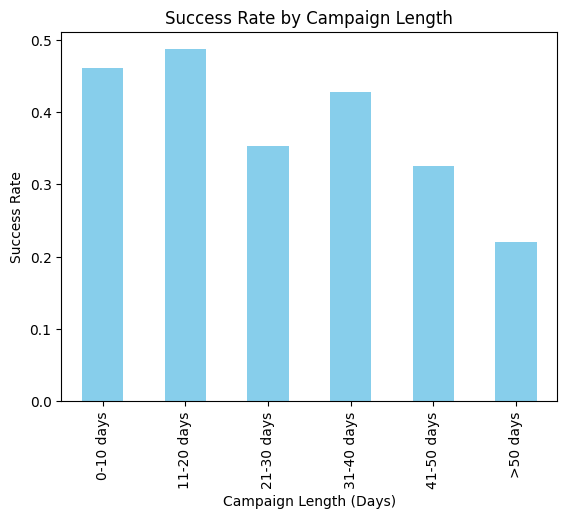

In [18]:
import pandas as pd

# Convert Launched and Deadline columns to datetime format (if not already)
data['Launched'] = pd.to_datetime(data['Launched'])
data['Deadline'] = pd.to_datetime(data['Deadline'])

# Calculate campaign length in days
data['Campaign_Length'] = (data['Deadline'] - data['Launched']).dt.days

# Average campaign length for successful and failed projects
avg_length_successful = data[data['State'] == 'Successful']['Campaign_Length'].mean()
avg_length_failed = data[data['State'] == 'Failed']['Campaign_Length'].mean()

print("Average Campaign Length (Successful):", avg_length_successful)
print("Average Campaign Length (Failed):", avg_length_failed)

# Analyze success rate by campaign length bins
data['Length_Bin'] = pd.cut(data['Campaign_Length'], bins=[0, 10, 20, 30, 40, 50, 100],
                            labels=["0-10 days", "11-20 days", "21-30 days", "31-40 days", "41-50 days", ">50 days"])

# Calculate success rate for each bin
length_bin_success_rate = data[data['State'] == 'Successful'].groupby('Length_Bin')['State'].count() / data.groupby('Length_Bin')['State'].count()
length_bin_success_rate = length_bin_success_rate.fillna(0)  # Handle bins with no projects
print("\nSuccess Rate by Campaign Length Bin:")
print(length_bin_success_rate)

# Optional: Visualize the success rate
import matplotlib.pyplot as plt

length_bin_success_rate.plot(kind='bar', color='skyblue', title='Success Rate by Campaign Length')
plt.ylabel('Success Rate')
plt.xlabel('Campaign Length (Days)')
plt.show()


Do projects from certain countries have higher success rates?

Success Rate by Country:
Country
United States     0.373522
United Kingdom    0.358380
Hong Kong         0.349515
Denmark           0.323450
Singapore         0.320721
New Zealand       0.309606
France            0.308949
Luxembourg        0.306452
Sweden            0.289698
Canada            0.280157
Australia         0.256410
Ireland           0.255240
Belgium           0.246353
Switzerland       0.246053
Norway            0.228814
Mexico            0.225585
Germany           0.224646
Spain             0.216169
Netherlands       0.215132
Austria           0.179229
Japan             0.175000
Italy             0.152536
Name: State, dtype: float64


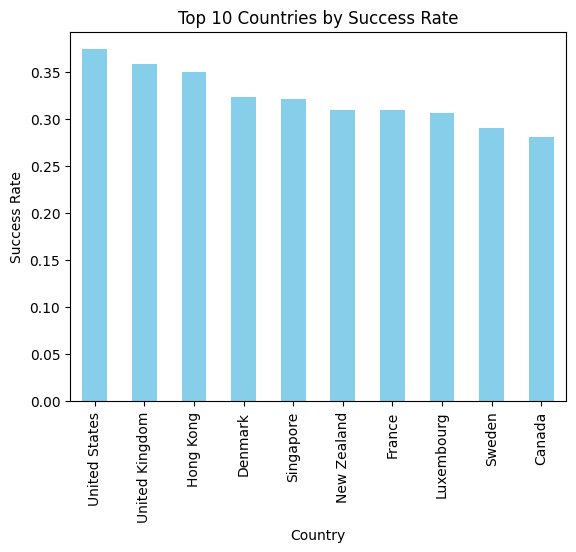

In [21]:
# Calculate the number of successful projects and total projects per country
country_success_count = data[data['State'] == 'Successful'].groupby('Country')['State'].count()
country_total_count = data.groupby('Country')['State'].count()

# Calculate success rate for each country
country_success_rate = (country_success_count / country_total_count).sort_values(ascending=False)

print("Success Rate by Country:")
print(country_success_rate)

# Optional: Visualize the results
import matplotlib.pyplot as plt

# Plot the top 10 countries by success rate
country_success_rate.head(10).plot(kind='bar', color='skyblue', title='Top 10 Countries by Success Rate')
plt.ylabel('Success Rate')
plt.xlabel('Country')
plt.show()


##Categories/Subcategories to Prioritize

In [22]:
# Success rate by category
category_success_rate = data[data['State'] == 'Successful'].groupby('Category')['State'].count() / data.groupby('Category')['State'].count()

# Success rate by subcategory
subcategory_success_rate = data[data['State'] == 'Successful'].groupby('Subcategory')['State'].count() / data.groupby('Subcategory')['State'].count()

# Sort and display top categories/subcategories
print("Top Categories to Prioritize:")
print(category_success_rate.sort_values(ascending=False).head(5))

print("\nTop Subcategories to Prioritize:")
print(subcategory_success_rate.sort_values(ascending=False).head(5))


Top Categories to Prioritize:
Category
Dance      0.620653
Theater    0.598845
Comics     0.539976
Music      0.486685
Art        0.408824
Name: State, dtype: float64

Top Subcategories to Prioritize:
Subcategory
Chiptune       0.771429
Residencies    0.724638
Anthologies    0.664541
Dance          0.664369
Indie Rock     0.639562
Name: State, dtype: float64


##Optimal Funding Goals to Set
Segment Funding Goals: Divide projects into bins based on their
funding goals (e.g., <$1,000, $1,000–$5,000, etc.).
Calculate Success Rates per Bin: Identify ranges where success rates are higher.
Recommendation: Suggest funding goals that fall within the ranges with higher success rates.

In [23]:
# Create bins for funding goals
data['Goal_Bin'] = pd.cut(data['Goal'], bins=[0, 1000, 5000, 10000, 50000, 100000, 1000000],
                          labels=["<1k", "1k-5k", "5k-10k", "10k-50k", "50k-100k", ">100k"])

# Success rate by funding goal bin
goal_bin_success_rate = data[data['State'] == 'Successful'].groupby('Goal_Bin')['State'].count() / data.groupby('Goal_Bin')['State'].count()

# Sort and display
print("Success Rate by Funding Goal Bin:")
print(goal_bin_success_rate.sort_values(ascending=False))


Success Rate by Funding Goal Bin:
Goal_Bin
<1k         0.490195
1k-5k       0.425220
5k-10k      0.350948
10k-50k     0.265676
50k-100k    0.138446
>100k       0.062349
Name: State, dtype: float64


##Regions to Focus On for Future Investments

In [24]:
# Calculate success rate by country
country_success_count = data[data['State'] == 'Successful'].groupby('Country')['State'].count()
country_total_count = data.groupby('Country')['State'].count()
country_success_rate = (country_success_count / country_total_count).sort_values(ascending=False)

# Filter countries with at least 10 projects
significant_countries = country_total_count[country_total_count >= 10]
country_success_rate_filtered = (country_success_count / significant_countries).dropna().sort_values(ascending=False)

print("Top Countries to Focus On:")
print(country_success_rate_filtered.head(5))


Top Countries to Focus On:
Country
United States     0.373522
United Kingdom    0.358380
Hong Kong         0.349515
Denmark           0.323450
Singapore         0.320721
Name: State, dtype: float64
